# Visualising Dataset

In [1]:
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

## Spiral (Healthy)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'drawings/spiral/training/healthy'

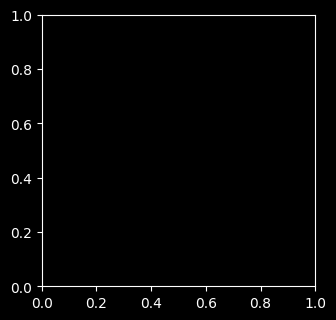

In [2]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/spiral/training/healthy/"+ os.listdir("drawings/spiral/training/healthy")[i])
    plt.imshow(img)   
plt.show() 

## Spiral (Parkinson)

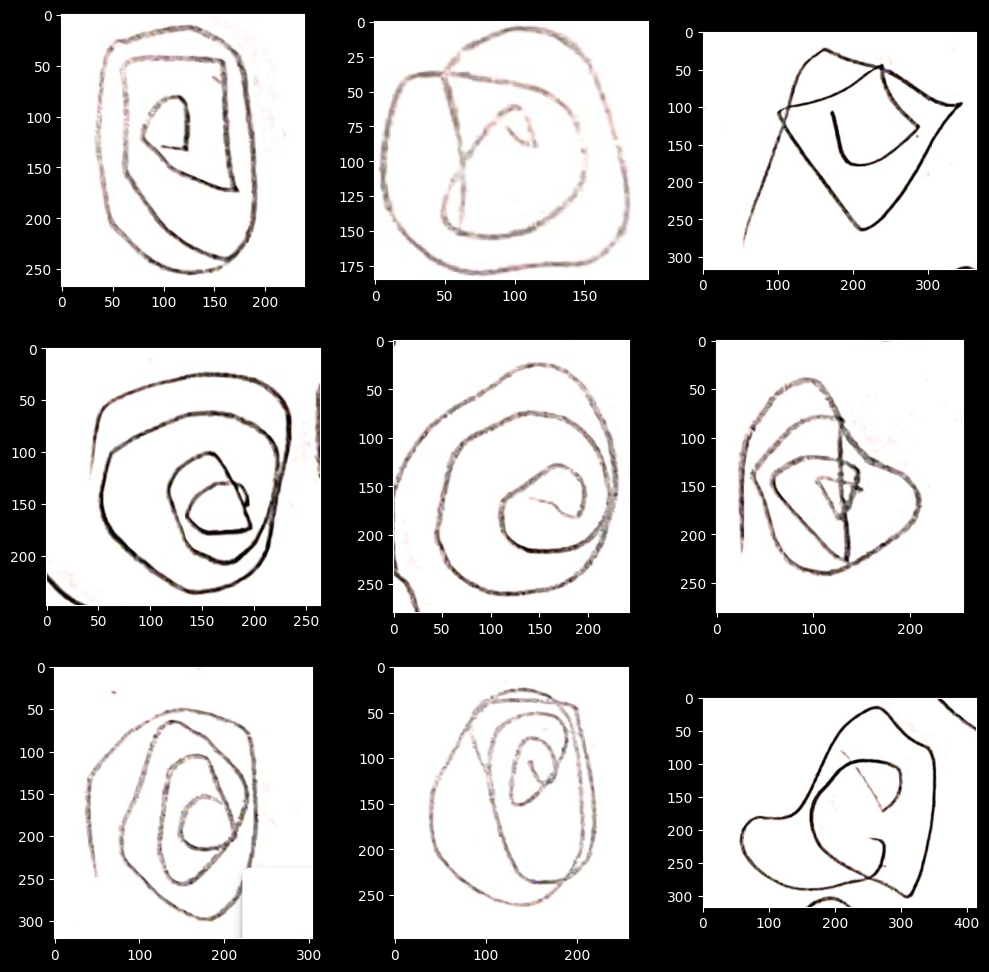

In [41]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/spiral/training/parkinson/"+
                  os.listdir("drawings/spiral/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

# # Wave (Healthy)

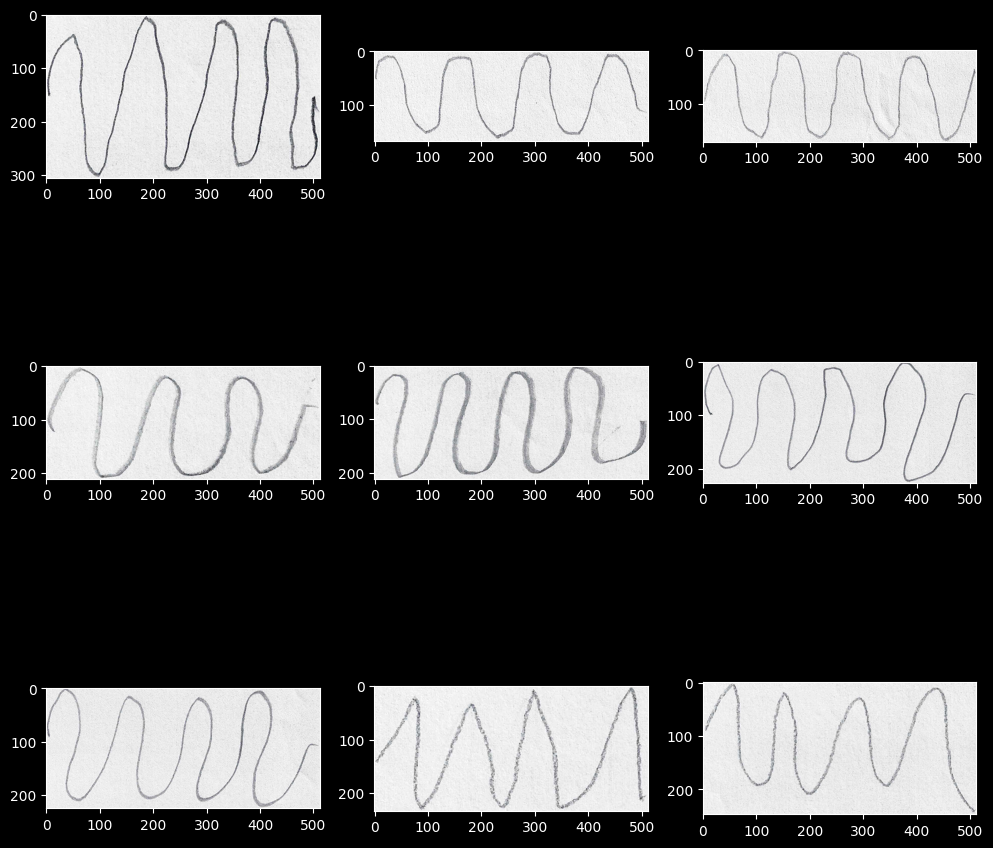

In [42]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/wave/training/healthy/"+
                  os.listdir("drawings/wave/training/healthy")[i])
    plt.imshow(img)   
plt.show()

# # Wave (Parkinson)

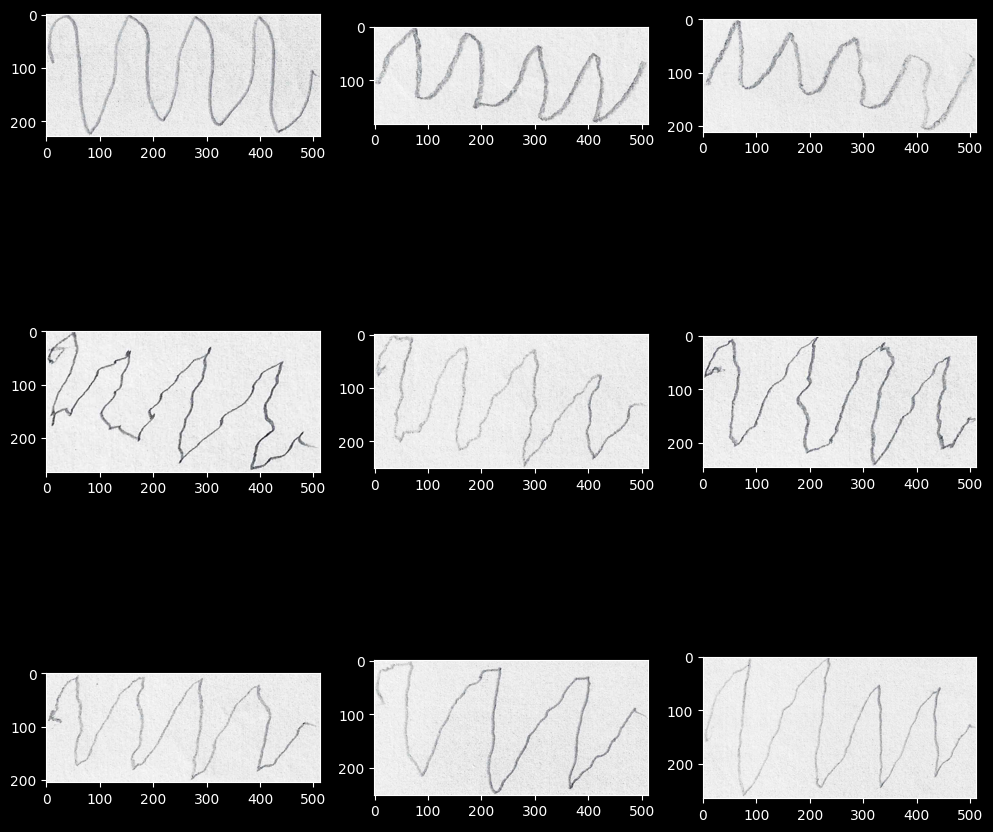

In [43]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/wave/training/parkinson/"+
                  os.listdir("drawings/wave/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

# Importing CNN Layers

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Building Classifier

In [45]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(activation='relu',units=128))
classifier.add(Dense(activation='sigmoid',units=1))

d:\EXtra projects\Parkinsons-disease-prediction-using-CNN-main\Parkinsons-disease-prediction-using-CNN-main\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Image Data Generation

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [47]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [48]:
spiral_train_generator = train_datagen.flow_from_directory(
    'drawings/spiral/training',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

spiral_test_generator = test_datagen.flow_from_directory(
    'drawings/spiral/testing',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 795 images belonging to 2 classes.


Found 100 images belonging to 2 classes.


In [49]:
wave_train_generator = train_datagen.flow_from_directory('drawings/wave/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

wave_test_generator = test_datagen.flow_from_directory('drawings/wave/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


# Fitting The Model with Data

In [50]:
from tensorflow.keras.optimizers import Adam

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

epochs = 10

classifier.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [51]:
# Compute steps per epoch
steps_per_epoch = spiral_train_generator.n // spiral_train_generator.batch_size
validation_steps = spiral_test_generator.n // spiral_test_generator.batch_size
print(steps_per_epoch)

# Fitting the model with the correct steps per epoch
history = classifier.fit(
    spiral_train_generator,
    steps_per_epoch=steps_per_epoch,  # Ensure this is set based on your dataset size
    epochs=10,
    validation_data=spiral_test_generator,
    validation_steps=validation_steps,  # Ensure this is set as well
    callbacks=callbacks_list
)

24


d:\EXtra projects\Parkinsons-disease-prediction-using-CNN-main\Parkinsons-disease-prediction-using-CNN-main\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.4970 - loss: 1.6034 - val_accuracy: 0.7812 - val_loss: 0.6104 - learning_rate: 0.0010
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.5817 - val_accuracy: 0.5000 - val_loss: 0.6411 - learning_rate: 0.0010
Epoch 3/10


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.7527 - loss: 0.5147 - val_accuracy: 0.8333 - val_loss: 0.4666 - learning_rate: 0.0010
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.7188 - loss: 0.6864 - val_accuracy: 1.0000 - val_loss: 0.2814 - learning_rate: 0.0010
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.7796 - loss: 0.4865 - val_accuracy: 0.8333 - val_loss: 0.4137 - learning_rate: 0.0010
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.3256 - val_accuracy: 0.7500 - val_loss: 0.6592 - learning_rate: 0.0010
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.7958 - loss: 0.4721 - val_accuracy: 0.8438 - val_loss: 0.4349 - learning_rate: 0.0010
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.9375 - loss: 0.2341 - val_accuracy: 0.7500 - val_loss: 0.5880 - learning_rate: 0.0010
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - accuracy: 0.8049 - loss: 0.4502 - val_accuracy:

# Plotting Accuracy and Loss

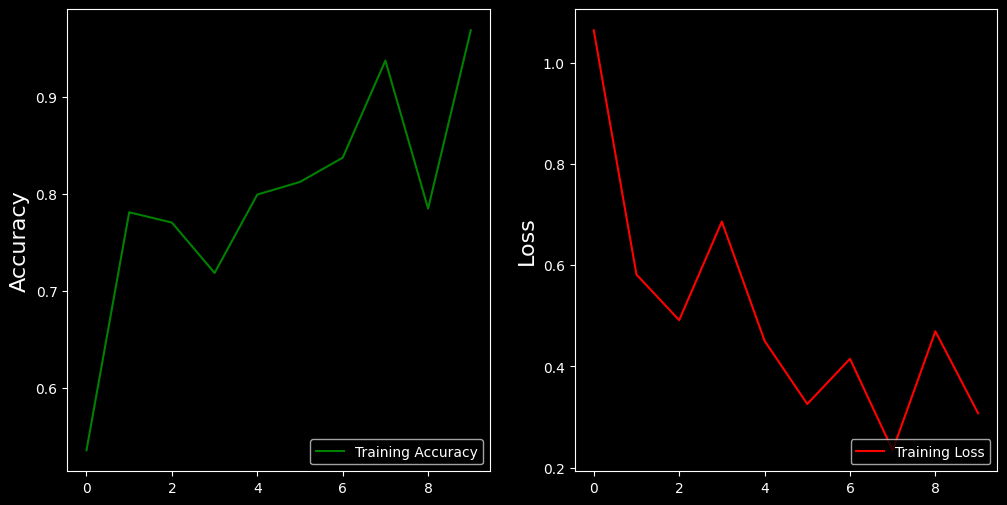

In [52]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.legend(loc='lower right')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()


In [53]:
# Save the model to a file
classifier.save('parkinson_disease_detection_model.h5')


In [55]:
from tensorflow.keras.models import load_model

# Load the saved model
classifier = load_model('parkinson_disease_detection_model(93%).h5')


In [56]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess a new image
img = load_img('drawings/spiral/testing/healthy/V01HE01.png', target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch size
img_array = img_array / 255.0  # Normalize the image

# Make a prediction
prediction = classifier.predict(img_array)

# Print the result
if prediction[0][0] > 0.5:
    print("The model predicts Parkinson's.")
else:
    print("The model predicts Healthy.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
The model predicts Healthy.
